In [1]:
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import elementwise_grad as egrad

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Gradient Ascent

This is a general concept that's used all over the machine learning & statistics world. In the `03-biology` notebook, we saw how we can compute the derivative of a function, and use it to visually find the maxima. In this notebook, we will do the same, except we'll make use of the gradient information to computationally figure out where the maxima is!

Firstly, let's bring back the logistic curve and its gradient.

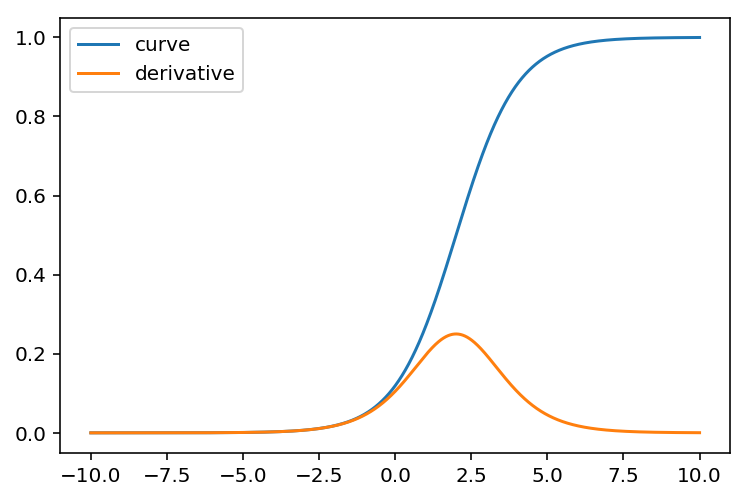

In [2]:
def logistic(x, L=1, x0=0, k=1):
    denom = 1 + np.exp(-k * (x - x0)) 
    return L / denom

logistic_grad = egrad(logistic)

x = np.linspace(-10, 10, 3000)
fnargs = {'x0': 2}
y = logistic(x, **fnargs)
y_prime =  logistic_grad(x, **fnargs)

plt.plot(x, y, label='curve')
plt.plot(x, y_prime, label='derivative')
plt.legend()

Looking at the curve, we can make the visual claim that the maximum gradient occurs at the point where $ x = 2 $. What is gradient descent/ascent all about, and how can we use this to compute the maxima/minima of a curve?

Gradient ascent/descent is basically this: Given a function and a starting point, climb/descend the curve according to the value of the gradient at that point.

In [8]:
logistic_grad_grad = egrad(logistic_grad)

def gradient_move(x, grad_fn, fun, tol, lr, fnargs, step_size=0.001, ascent=False):
    """
    Simple implementation of gradient descent. 
    
    :param x: Initialized value of x.
    :param grad_fn: The gradient function.
    :param step_size: Step size to take.
    :param tol: Tolerance.
    :param lr: learning rate.
    :param fnargs: Function arguments.
    """
    ts = []
    xs = []
    prev_step_size = step_size
    t = 0

    while prev_step_size > tol:
        t += 1
        prev_x = x
        xs.append(prev_x)
        ts.append(t)
        # print(x, t)
        if ascent:
            x += step_size * grad_fn(prev_x, **fnargs) * lr
        else:
            x -= step_size * grad_fn(prev_x, **fnargs) * lr
        prev_step_size = abs(x - prev_x)

    return (ts, xs)

ts, xs = gradient_move(-2.0, grad_fn=logistic_grad_grad, fun=logistic_grad, 
                       tol=1E-6, lr=0.99, step_size=0.1, fnargs=fnargs, 
                       ascent=True)

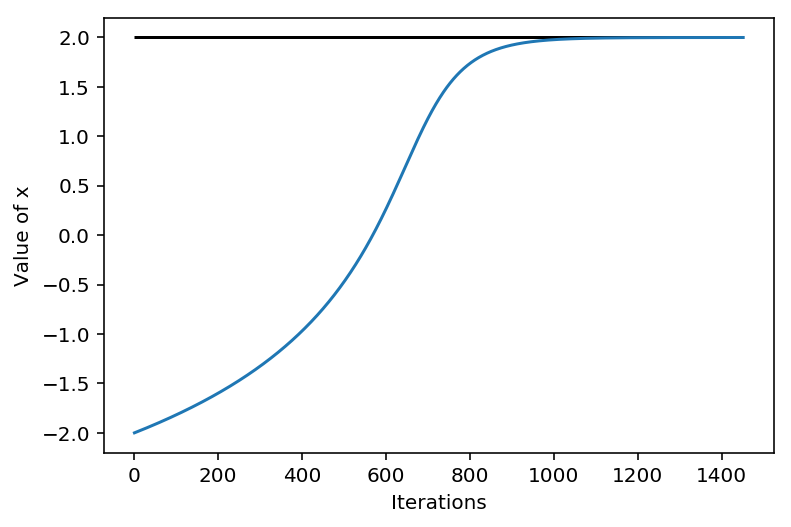

In [13]:
plt.plot(ts, xs)
plt.ylabel('Value of x')
plt.xlabel('Iterations')
ax = plt.gca()
plt.hlines(y=2, xmin=min(ts), xmax=max(ts))

We've converged on the value 2! (In this case, we're just super close to 2, but not exactly 2.)

# Gradient Descent

Gradient descent is basically the opposite of gradient ascent. Both fall under the class of "optimization" problems, and where we can use gradients to do the optimization, we call it "gradient-based optimization".

Let's look at the case of $ y = 3x^4 - 8x^3 + 2x^2 -3 $. Where does the minima fall?

From the fact that it is a polynomial equation with highest power 4 and a positive coefficient, we know that it has a minima and has a parabolic shape. But solving for that value would be.... kinda hard. The derivative would be:

$$ \frac{dy}{dx} = 12x^3 - 24x^2 + 4x $$

Setting that to be equal to zero, we can start to solve for a cubic equation... which I really don't want to go there. I used an online solver to get the answer:

$$ x=0,\:x=\frac{3+\sqrt{6}}{3},\:x=\frac{3-\sqrt{6}}{3} $$

Let's try using autograd to figure out where the minima is going to be.

In [14]:
def polynomial(x):
    return 3 * np.power(x, 4) - 8 * np.power(x, 3) + 2 * np.power(x, 2) - 3


polynomial_grad = egrad(polynomial)

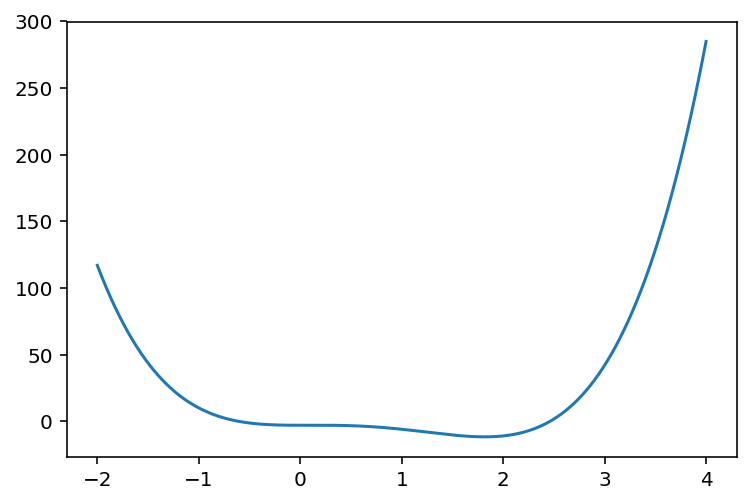

In [15]:
fig = plt.figure()
x = np.linspace(-2, 4, 2000)
y = polynomial(x)

plt.plot(x, y)

In [16]:
ts, xs = gradient_move(3.0, grad_fn=polynomial_grad, fun=polynomial, 
                          tol=1E-15, lr=0.9, fnargs={},
                          ascent=False)

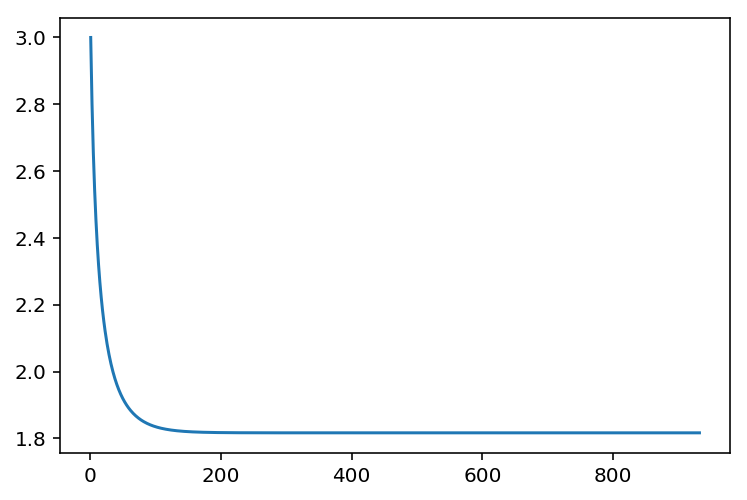

In [17]:
plt.plot(ts, xs)

In [18]:
xs[-1]

1.8164965809277569

Compare the computed answer to the analytical one:

In [19]:
(3 + np.sqrt(6)) / 3

1.816496580927726